In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook
import sys

# ACDC utils
sys.path.append('/workspace/DQTools')
from utils import *

/opt/tljh/user/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Assimila Change Detection for Coastlines - ACDC

### Get data using DQManager - data processed on the server side
- The client needs to access the server where the Data Cube is installed via SSH or Jupyter Notebooks
- Multiprocessing is possible using [DASK](https://dask.org/)

In [2]:
# Set request parameters
product = 'S2_SR'
subproduct = ['B2', 'B3', 'B4', 'B8']

start=dt.datetime(2020, 6, 25)
stop=dt.datetime(2020, 6, 25)

tile = 'OS'

ds = get_data(product, subproduct, start, stop, tile)

In [3]:
ds

[<xarray.Dataset>
 Dimensions:    (latitude: 3910, longitude: 12598, time: 1)
 Coordinates:
   * time       (time) datetime64[ns] 2020-06-25
   * latitude   (latitude) float64 5.887e+06 5.887e+06 ... 5.848e+06 5.848e+06
   * longitude  (longitude) float64 6.676e+05 6.676e+05 ... 7.935e+05 7.935e+05
 Data variables:
     B2         (time, latitude, longitude) int16 dask.array<shape=(1, 3910, 12598), chunksize=(1, 251, 256)>
 Attributes:
     transform:      [667560.0, 10.0, 0.0, 5886640.0, 0.0, -10.0]
     crs:            +init=epsg:32630
     res:            (10.0, 10.0)
     is_tiled:       1
     nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
     AREA_OR_POINT:  Area
     last_gold:      2020
     product:        S2_SR
     version:        Sen2Cor,
 <xarray.Dataset>
 Dimensions:    (latitude: 3910, longitude: 12598, time: 1)
 Coordinates:
   * time       (time) datetime64[ns] 2020-06-25
   * latitude   (latitude) float64 5.887e+06 5.887e+06 ... 5.848e+0

In [4]:
# Set variables for individual bands
blue = ds[0].B2
green = ds[1].B3
red = ds[2].B4
nir = ds[3].B8

<IPython.core.display.Javascript object>


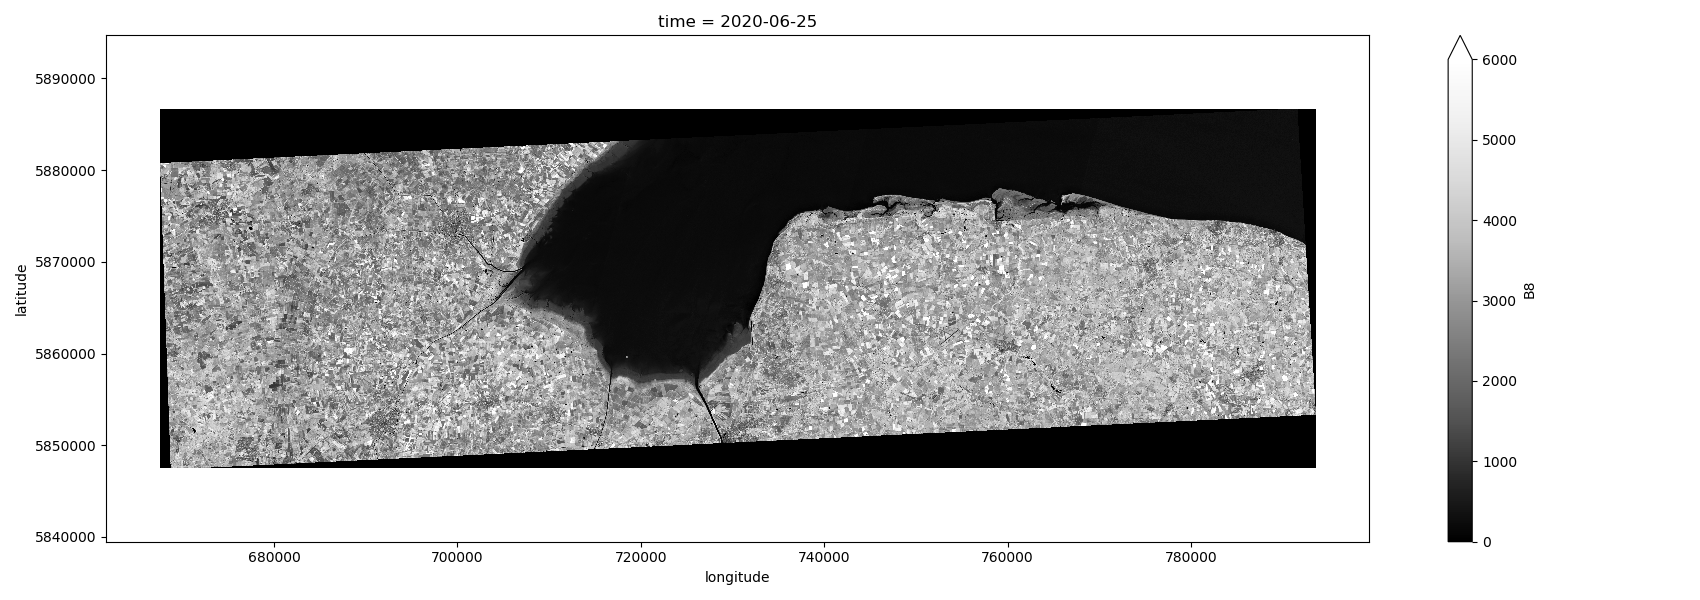

In [5]:
# Plot the nir band data
fig, cx = plt.subplots(figsize=(17,6))

nir[0].plot.imshow(ax=cx, cmap='Greys_r', vmin=0, vmax=6000)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Create RGB true/false colour images

<IPython.core.display.Javascript object>


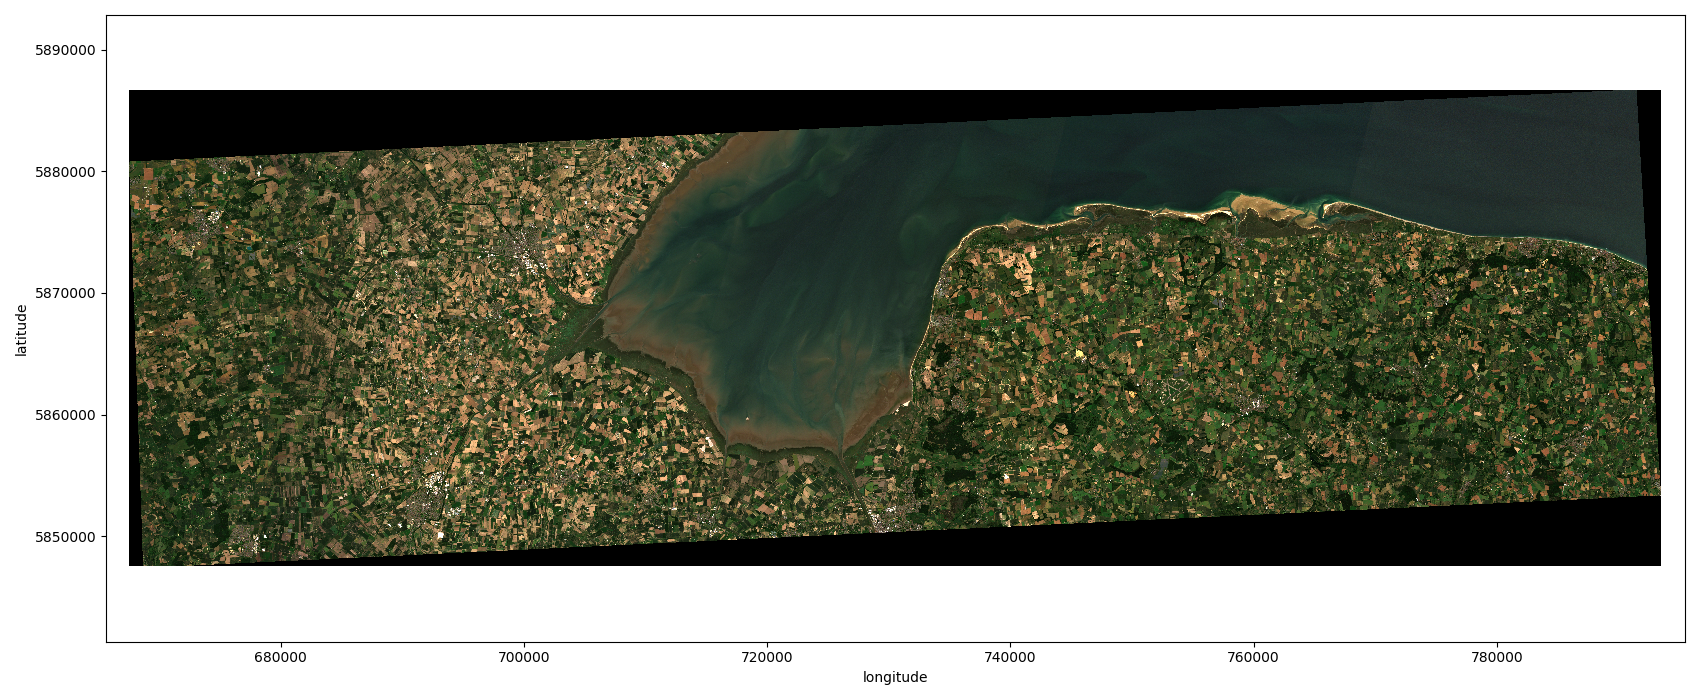

/workspace/DQTools/utils.py:32: FutureWarning: the order of the arguments on DataArray.to_dataset has changed; you now need to supply ``name`` as a keyword argument
  rgb = rgb.to_dataset('RGB')


In [6]:
# Create an RGB stack
rgb = create_rgb(red, green, blue, vmax=2500)

In [7]:
# Save xarray to GeoTiff file
save_xarray('RGB_20200625.tif', rgb, 'RGB', product='S2_SR')

### Compute NDVI

In [8]:
ndvi = (nir - red) / (nir + red)
ndvi = ndvi.compute()

/opt/tljh/user/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/opt/tljh/user/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


<IPython.core.display.Javascript object>


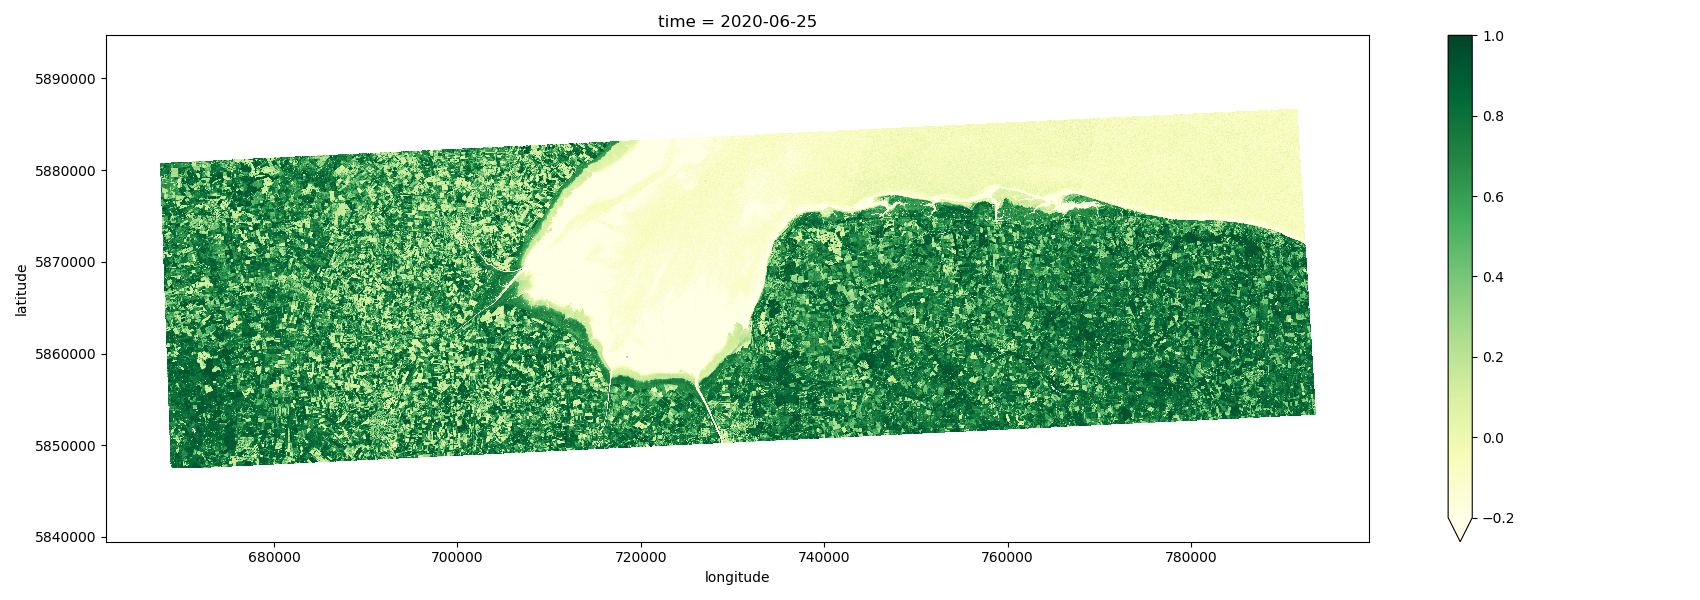

In [9]:
# Plot some data
fig, cx = plt.subplots(figsize=(17,6))

ndvi[0].plot.imshow(ax=cx, cmap='YlGn', vmin=-0.2, vmax=1.0)
plt.axis('equal')
plt.tight_layout()
plt.show()